In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 40)
pd.set_option('display.max_colwidth', 300)

In [2]:
beer=pd.read_csv('../data/processed/clean_styles_mapped.csv',index_col=0)
beer.head() #color=SRM

,Name,Style,StyleID,ABV,IBU,Color,Simple_style,Style_color,Style_ibu
0,Vanilla Cream Ale,Cream Ale,45,5.48,17.65,4.83,Pale Lager/Blonde Ale,1,1
2,Zombie Dust Clone - EXTRACT,American IPA,7,5.91,59.25,8.98,Pale Ale,2,5
3,Zombie Dust Clone - ALL GRAIN,American IPA,7,5.80,54.48,8.50,Pale Ale,2,5
4,Bakke Brygg Belgisk Blonde 50 l,Belgian Blond Ale,20,6.48,17.84,4.57,Pale Lager/Blonde Ale,1,1
5,Sierra Nevada Pale Ale Clone,American Pale Ale,10,5.58,40.12,8.00,Pale Ale,2,5


In [3]:
beer.describe(include='all')

,Name,Style,StyleID,ABV,IBU,Color,Simple_style,Style_color,Style_ibu
count,59716,59716,59716.000000,59716.000000,59716.000000,59716.000000,59716,59716.000000,59716.000000
unique,48038,79,NaN,NaN,NaN,NaN,6,NaN,NaN
top,Awesome Recipe,American IPA,NaN,NaN,NaN,NaN,Pale Ale,NaN,NaN
freq,1046,11940,NaN,NaN,NaN,NaN,30835,NaN,NaN
mean,NaN,NaN,51.285635,6.124870,46.526609,13.106287,NaN,2.230106,3.565996
std,NaN,NaN,55.610452,1.769186,42.355443,12.325109,NaN,1.394857,1.822680
min,NaN,NaN,4.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000
25%,NaN,NaN,7.000000,5.090000,24.980000,5.010000,NaN,1.000000,1.000000
50%,NaN,NaN,20.000000,5.790000,37.535000,7.770000,NaN,2.000000,5.000000
75%,NaN,NaN,90.000000,6.810000,58.760000,15.270000,NaN,2.000000,5.000000


In [4]:
beer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59716 entries, 0 to 73860
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          59716 non-null  object 
 1   Style         59716 non-null  object 
 2   StyleID       59716 non-null  int64  
 3   ABV           59716 non-null  float64
 4   IBU           59716 non-null  float64
 5   Color         59716 non-null  float64
 6   Simple_style  59716 non-null  object 
 7   Style_color   59716 non-null  int64  
 8   Style_ibu     59716 non-null  int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 4.6+ MB


<Axes: >

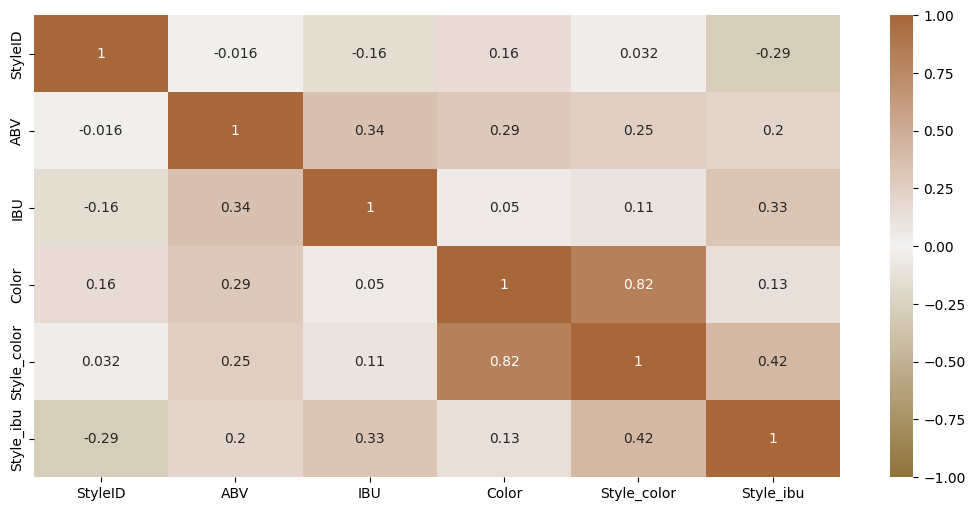

In [3]:
#pearson
plt.figure(figsize=(13,6))
palette = sns.diverging_palette(60,35, n=12, center="light", as_cmap=True)
sns.heatmap(beer.corr(method='pearson',numeric_only=True),cmap=palette,annot=True,vmin=-1)

<Axes: >

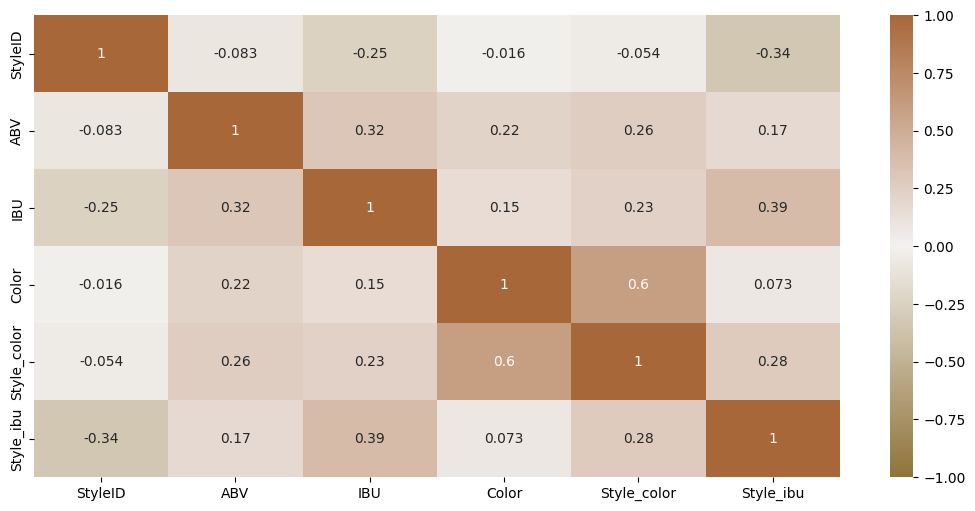

In [4]:
#kendall
plt.figure(figsize=(13,6))
palette = sns.diverging_palette(60,35, n=12, center="light", as_cmap=True)
sns.heatmap(beer.corr(method='kendall',numeric_only=True),cmap=palette,annot=True,vmin=-1)

In [12]:
beer.columns

Index(['Name', 'Style', 'StyleID', 'ABV', 'IBU', 'Color', 'Simple_style',
       'Style_code'],
      dtype='object')

In [26]:
beer.groupby('Simple_style')[['ABV','IBU','Color']].mean().reset_index().sort_values(by='Simple_style')

,Simple_style,ABV,IBU,Color
0,Brown Ale,5.598211,28.810953,22.356060
1,Pale Ale,6.155878,54.015643,8.472880
2,Pale Lager/Blonde Ale,5.028702,20.120539,4.047743
3,Stout/Porter,6.818976,46.055499,37.568880
4,Strong Ale,8.477804,44.716198,16.056057
5,Wheat,5.131178,17.906383,4.324667


Text(0.5, 1.0, 'Colors per beer style')

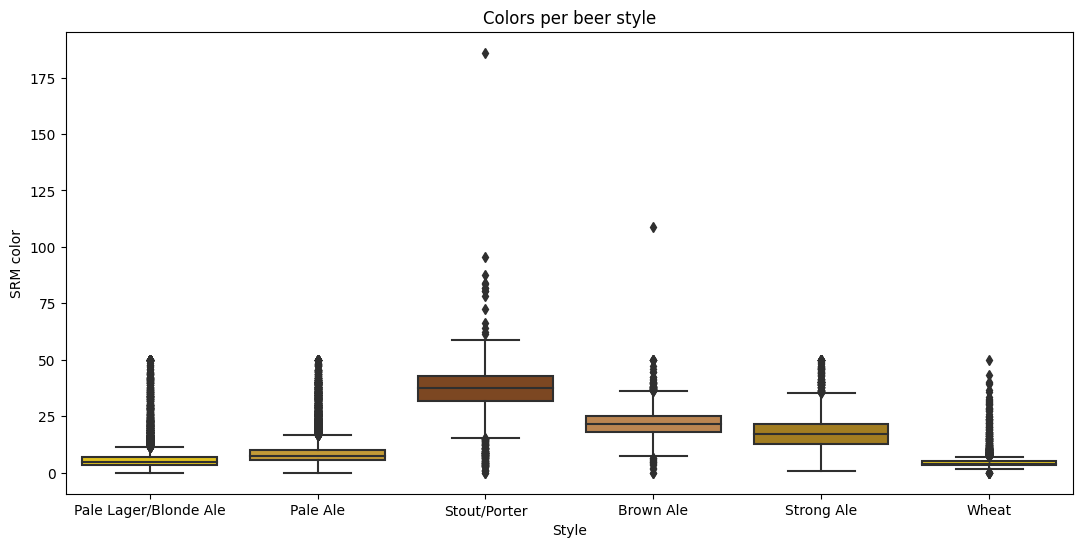

In [5]:
plt.figure(figsize=(13,6))
sns.boxplot(beer,y='Color',x='Simple_style',palette=['gold','goldenrod','saddlebrown','peru','darkgoldenrod'])
plt.xlabel('Style')
plt.ylabel('SRM color')
plt.title('Colors per beer style')

Text(0.5, 1.0, 'Bitterness per beer style')

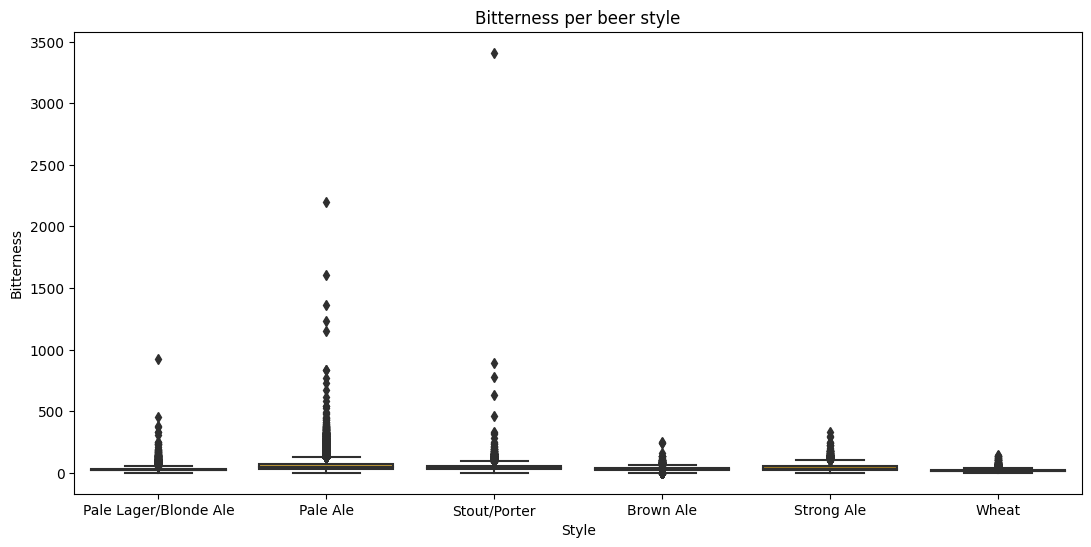

In [7]:
plt.figure(figsize=(13,6))
sns.boxplot(beer,y='IBU',x='Simple_style', palette=['gold','goldenrod','saddlebrown','peru','darkgoldenrod'])#,'lemmonchiffon'])
# plt.ylim(0,400)
# plt.
plt.xlabel('Style')
plt.ylabel('Bitterness')
plt.title('Bitterness per beer style')

Text(0.5, 1.0, 'Alcohol level per beer style')

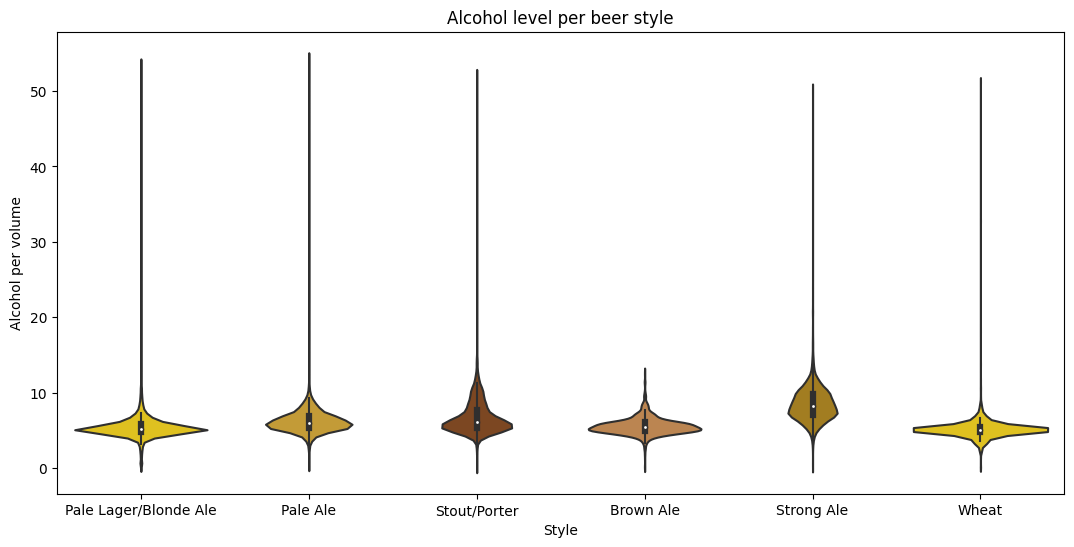

In [6]:
plt.figure(figsize=(13,6))
sns.violinplot(beer,y='ABV',x='Simple_style',palette=['gold','goldenrod','saddlebrown','peru','darkgoldenrod'])
plt.xlabel('Style')
plt.ylabel('Alcohol per volume')
plt.title('Alcohol level per beer style')

In [13]:
beerd_stats=beer.groupby(['Simple_style'])[['ABV','IBU','Color',]].describe().sort_values(by='Simple_style').reset_index()
beerd_stats

Simple_style      ABV                                         \
                            count      mean       std   min   25%    50%   
0              Brown Ale   1848.0  5.574199  1.095113  1.71  4.90  5.430   
1               Pale Ale  29857.0  6.173545  1.381018  0.08  5.31  6.010   
2  Pale Lager/Blonde Ale   9635.0  5.222649  0.766637  0.03  4.77  5.180   
3           Stout/Porter   8485.0  6.719241  2.204599  0.08  5.28  6.100   
4             Strong Ale   2900.0  8.524662  2.119000  6.00  7.03  8.225   
5                  Wheat   4344.0  5.134567  0.903797  0.45  4.72  5.100   

                    IBU                                                        \
    75%    max    count       mean        std    min      25%    50%      75%   
0  6.03  12.76   1848.0  34.422413  18.505288   1.72  24.4175  29.78  38.5925   
1  6.86  50.48  29857.0  54.631656  21.435418  30.00  35.2900  49.22  71.2300   
2  5.74   6.50   9635.0  23.716546   5.197385   8.00  20.3900  25.97  28.0000   
3  7.65  52.16   8485.0  45.671659  19.923502  18.00  30.9400  39.85  56.8000   
4  9.73  50.04   2900.0  44.305403  24.807590  20.00  25.3975  34.61  56.0725   
5  5.48  18.26   4344.0  17.779910   7.278097   0.40  12.7000  16.71  22.9800   

             Color                                                           
      max    count       mean       std    min     25%    50%     75%   max  
0  246.16   1848.0  22.152900  5.736973  12.00  18.185  21.42  25.355  50.0  
1  100.00  29857.0   8.251554  3.086156   5.00   5.610   7.39  10.080  15.0  
2   28.00   9635.0   4.656812  1.151212   0.11   3.640   4.62   6.000   6.0  
3   90.00   8485.0  37.518085  8.150185  17.00  31.880  37.69  42.820  50.0  
4  100.00   2900.0  15.972483  5.712635   3.04  12.510  17.14  21.730  22.0  
5   30.00   4344.0   4.298973  0.985964   2.01   3.580   4.05   5.010   6.0

### Let's check if the values in the DF match the 'definitions' from [Brewersfriend.com](https://www.brewersfriend.com/beer-charts/) and the limit values they stablish for each beer style.

#### Remove duplicated beers

In [3]:
beer=beer.drop_duplicates(subset='Name')

In [9]:
beer['Simple_style'].value_counts()

Simple_style
Pale Ale                 25331
Pale Lager/Blonde Ale     8088
Stout/Porter              6857
Wheat                     3660
Strong Ale                2483
Brown Ale                 1619
Name: count, dtype: int64

#### Remove and correct outliers (wrong values)

Bear in mind that amateur users uploaded their own values, which sometimes do not correspond to the actual standards they should follow.

In [8]:
# beer.loc[beer['IBU'].idxmax()] #remove outlier
beer = beer[beer['IBU'] != 3409.3]

In [9]:
#CORRECT LAGERS WITH WRONG COLOR (outliers)
beer.loc[(beer['Simple_style'] == 'Pale Lager/Blonde Ale') & (beer['Color'] > 6), 'Color'] = 6

# beer = beer.drop(beer[(beer['Simple_style'] == 'Pale Lager/Blonde Ale') & (beer['Color'] > 6)].index)

In [16]:
# beere.loc[beere['IBU'].idxmax()] #remove outlier
# beere = beere[beere['IBU'] != 3409.3]

In [10]:
#CORRECT WRONG IBU FOR BLONDE ALES/LAGERS
beer.loc[(beer['Simple_style'] == 'Pale Lager/Blonde Ale') & (beer['IBU'] > 28), 'IBU'] = 28

#plan b would be to drop them
# beere = beere.drop(beere[(beere['Simple_style'] == 'Pale Lager/Blonde Ale') & (beere['IBU'] > 28)].index)

In [24]:
beer['Simple_style'].value_counts()

Simple_style
Pale Ale                 25331
Stout/Porter              6857
Pale Lager/Blonde Ale     5698
Wheat                     3660
Strong Ale                2483
Brown Ale                 1619
Name: count, dtype: int64

In [14]:
beer.loc[beer['ABV'].idxmin()]

Name              Frothy Chimichangas
Style              Oktoberfest/Märzen
StyleID                           115
ABV                              0.03
IBU                              28.0
Color                            0.11
Simple_style    Pale Lager/Blonde Ale
Style_color                         1
Style_ibu                           1
Name: 7027, dtype: object

Remove ABV outlier and missing values stored as zero

In [15]:
beer.loc[beer['ABV'].idxmax()] #drop outlier

Name                  BCBD RIS
Style           Imperial Stout
StyleID                     87
ABV                      52.16
IBU                       90.0
Color                     50.0
Simple_style      Stout/Porter
Style_color                  5
Style_ibu                    4
Name: 30516, dtype: object

In [11]:
beer.loc[beer['Simple_style'] == 'Brown Ale'].loc[beer.loc[beer['Simple_style'] == 'Brown Ale']['Color'].idxmax()]

Name            Nut Brown Ale partial mash
Style                   American Brown Ale
StyleID                                  6
ABV                                    0.3
IBU                                    0.0
Color                               108.65
Simple_style                     Brown Ale
Style_color                              4
Style_ibu                                2
Name: 1744, dtype: object

In [12]:
beer = beer[beer['ABV'] != 54.72]
beer = beer[(beer['ABV'] != 0.0) & (beer['IBU'] != 0.0) & (beer['Color'] != 0.0)]

In [13]:
#SET ABV LIMIT FOR SEVERAL TYPES
beer.loc[(beer['Simple_style'] == 'Strong Ale') & (beer['ABV'] < 6), 'ABV'] = 6
# beere.loc[(beere['Simple_style'] == 'Stout/Porter') & (beere['ABV'] > 12), 'ABV'] = 12

beer.loc[(beer['Simple_style'] == 'Pale Lager/Blonde Ale') & (beer['ABV'] > 6.5), 'ABV'] = 6.4

#SET COLOR LIMIT FOR PALE ALES
beer.loc[(beer['Simple_style'] == 'Pale Ale') & (beer['Color'] > 15), 'Color'] = 15
beer.loc[(beer['Simple_style'] == 'Pale Ale') & (beer['Color'] < 5), 'Color'] = 5

In [14]:
#SET IBU LIMIT FOR SEVERAL STYLES
beer.loc[(beer['Simple_style'] == 'Pale Ale') & (beer['IBU'] > 100), 'IBU'] = 90
beer.loc[(beer['Simple_style'] == 'Stout/Porter') & (beer['IBU'] > 90), 'IBU'] = 90
beer.loc[(beer['Simple_style'] == 'Stout/Porter') & (beer['IBU'] < 18), 'IBU'] = 18
beer.loc[(beer['Simple_style'] == 'Strong Ale') & (beer['IBU'] < 20), 'IBU'] = 20
beer.loc[(beer['Simple_style'] == 'Strong Ale') & (beer['IBU'] > 100), 'IBU'] = 100
beer.loc[(beer['Simple_style'] == 'Wheat') & (beer['IBU'] > 30), 'IBU'] = 30
beer.loc[(beer['Simple_style'] == 'Pale Lager/Blonde Ale') & (beer['IBU'] < 8), 'IBU'] = 8
beer.loc[(beer['Simple_style'] == 'Pale Ale') & (beer['IBU'] < 30), 'IBU'] = 30

In [15]:
#SET COLOR LIMIT FOR SEVERAL STYLES (according to brewfriend.com)
beer.loc[(beer['Simple_style'] == 'Wheat') & (beer['Color'] > 6), 'Color'] = 6
beer.loc[(beer['Simple_style'] == 'Strong Ale') & (beer['Color'] > 22), 'Color'] = 22
beer.loc[(beer['Simple_style'] == 'Brown Ale') & (beer['Color'] < 12), 'Color'] = 12
beer.loc[(beer['Simple_style'] == 'Stout/Porter') & (beer['Color'] < 17), 'Color'] = 17

In [10]:
beerd_stats=beer.groupby('Simple_style')[['ABV','IBU','Color',]].median().sort_values(by='Simple_style')
beerd_stats

,ABV,IBU,Color
Simple_style,,,
Brown Ale,5.430,29.78,21.42
Pale Ale,6.010,49.22,7.39
Pale Lager/Blonde Ale,5.180,25.97,4.62
Stout/Porter,6.100,39.85,37.69
Strong Ale,8.225,34.61,17.14
Wheat,5.100,16.71,4.05


In [16]:
#Reset the index due to the dropped rows
beer.reset_index(drop=True, inplace=True)

In [18]:
beer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57069 entries, 0 to 57068
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          57069 non-null  object 
 1   Style         57069 non-null  object 
 2   StyleID       57069 non-null  int64  
 3   ABV           57069 non-null  float64
 4   IBU           57069 non-null  float64
 5   Color         57069 non-null  float64
 6   Simple_style  57069 non-null  object 
 7   Style_color   57069 non-null  int64  
 8   Style_ibu     57069 non-null  int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 3.9+ MB


In [23]:
# beer.to_csv('../data/processed/final_dataset.csv',index=False)

In [22]:
beer['Style_color'][beer['Style_color'].isna()]

Series([], Name: Style_color, dtype: int64)

After correcting the outliers and wrong values, we can see the heatmaps and boxplots have improved:

<Axes: >

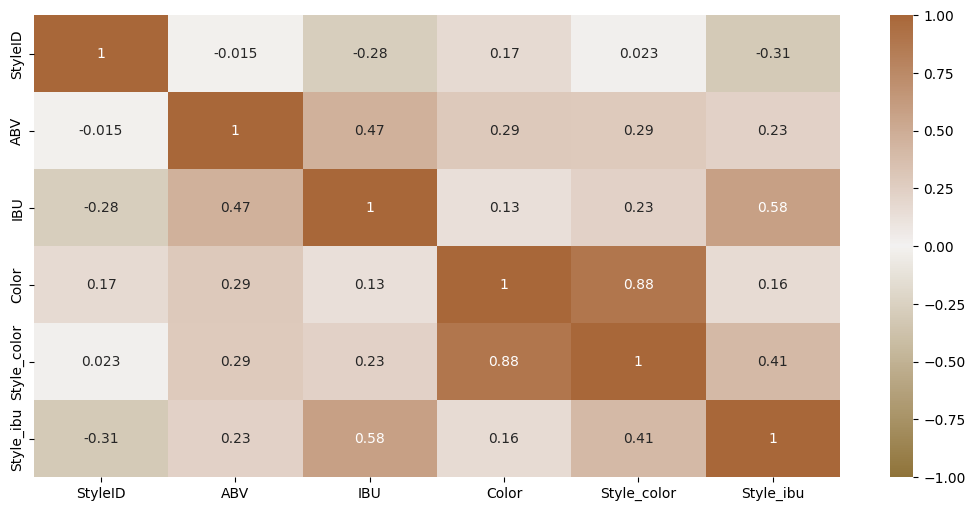

In [17]:
#pearson
plt.figure(figsize=(13,6))
palette = sns.diverging_palette(60,35, n=12, center="light", as_cmap=True)
sns.heatmap(beer.corr(method='pearson',numeric_only=True),cmap=palette,annot=True,vmin=-1)

<Axes: >

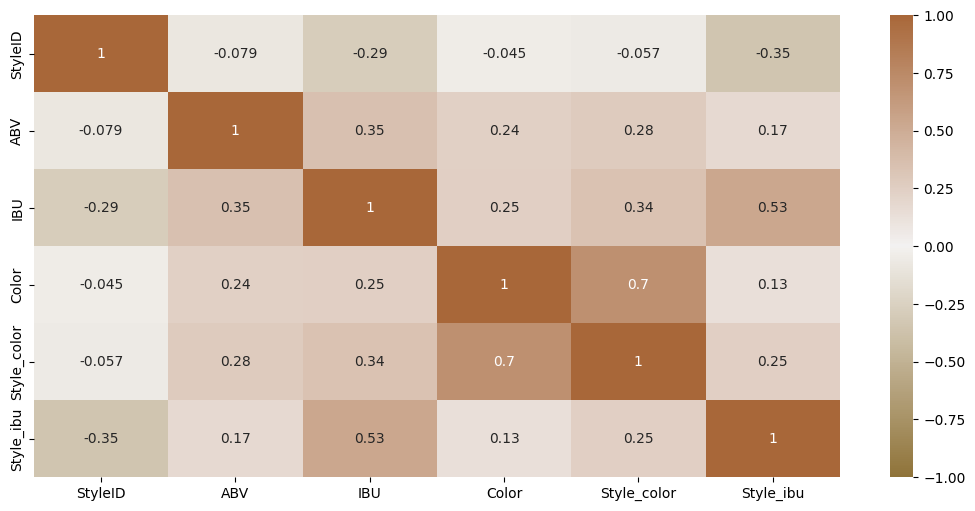

In [21]:
#kendall
plt.figure(figsize=(13,6))
palette = sns.diverging_palette(60,35, n=12, center="light", as_cmap=True)
sns.heatmap(beer.corr(method='kendall',numeric_only=True),cmap=palette,annot=True,vmin=-1)

Text(0.5, 1.0, 'Colors per beer style (no outliers)')

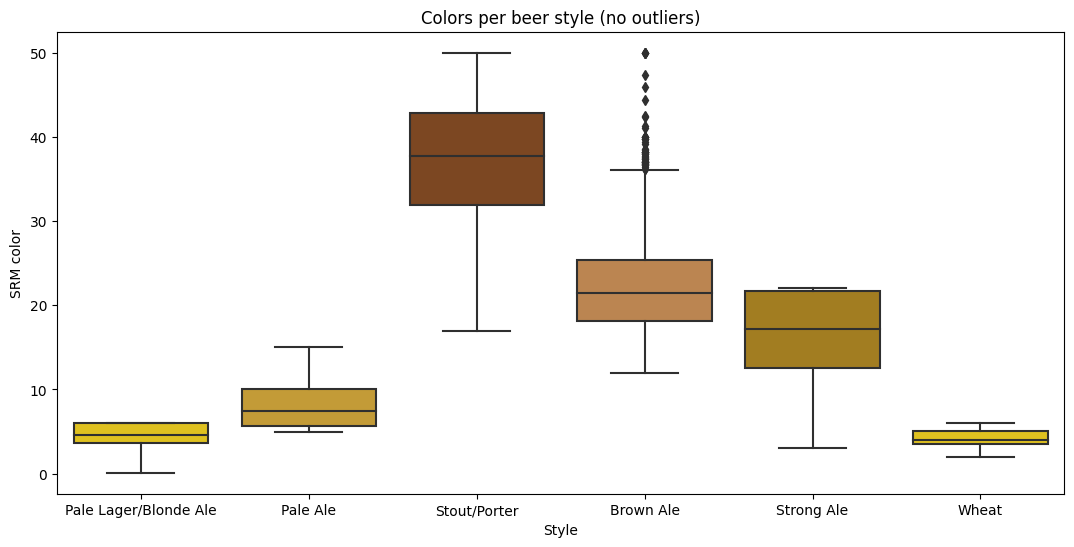

In [18]:
plt.figure(figsize=(13,6))
sns.boxplot(beer,y='Color',x='Simple_style',palette=['gold','goldenrod','saddlebrown','peru','darkgoldenrod'])
plt.xlabel('Style')
plt.ylabel('SRM color')
plt.title('Colors per beer style (no outliers)')

Text(0.5, 1.0, 'Bitterness per beer style (limited)')

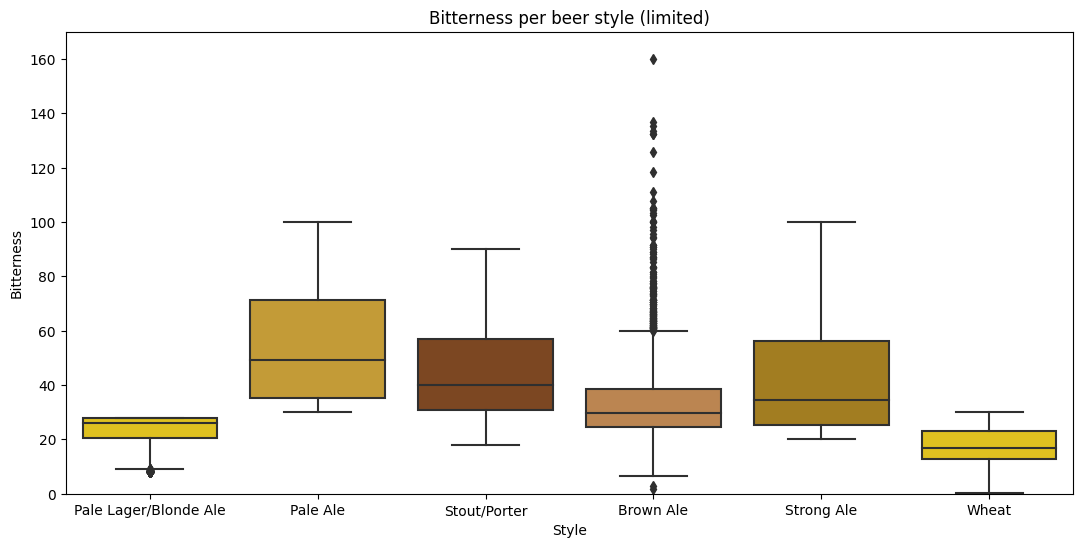

In [19]:
plt.figure(figsize=(13,6))
sns.boxplot(beer,y='IBU',x='Simple_style', palette=['gold','goldenrod','saddlebrown','peru','darkgoldenrod'])#,'lemmonchiffon'])
plt.ylim(0,170)
plt.xlabel('Style')
plt.ylabel('Bitterness')
plt.title('Bitterness per beer style (limited)')

<Axes: xlabel='Simple_style', ylabel='ABV'>

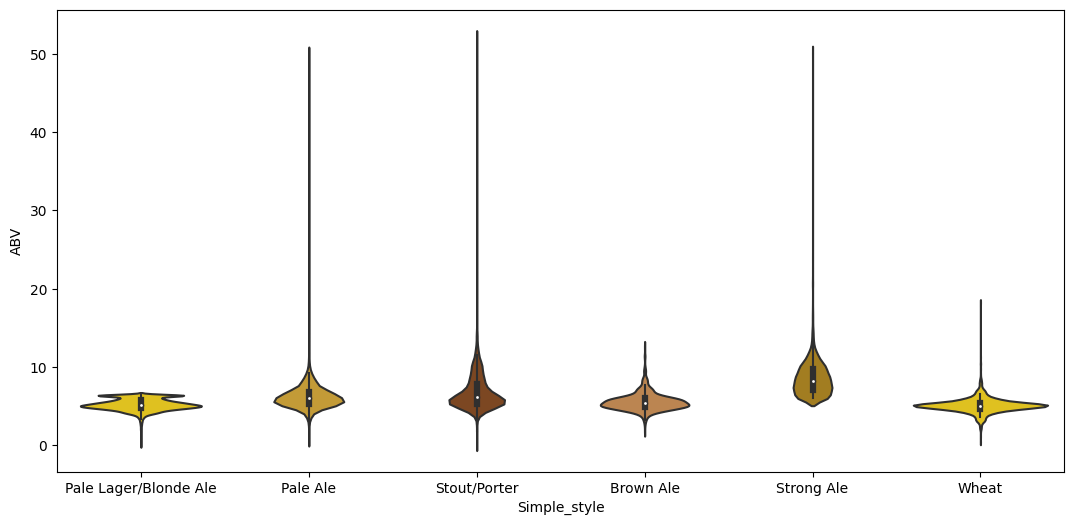

In [24]:
plt.figure(figsize=(13,6))
sns.violinplot(beer,y='ABV',x='Simple_style',palette=['gold','goldenrod','saddlebrown','peru','darkgoldenrod'])

We are ready to train our models.